<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/Draw_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [ ]:
import pygame, sys
import os, numpy as np
from tkinter import *
from tkinter import messagebox
import tensorflow as tf

class pixel(object):
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.color = (255, 255, 255)
        self.neighbors = []

    def draw(self, surface):
        pygame.draw.rect(surface, self.color, (self.x, self.y, self.width + self.x, self.y + height))

    def getNeighbors(self, g):
        j = self.x // 20
        i = self.y // 20
        rows = cols = 28

        # Horizontal and vertical neighbors
        if i < cols - 1:  # Right
            self.neighbors.append(g.pixels[i + 1][j])
        if i > 0:  # Left
            self.neighbors.append(g.pixels[i - 1][j])
        if j < rows - 1:  # Up
            self.neighbors.append(g.pixels[i][j + 1])
        if j > 0:  # Down
            self.neighbors.append(g.pixels[i][j - 1])

        # Diagonal neighbors
        if j > 0 and i > 0:  # Top Left
            self.neighbors.append(g.pixels[i - 1][j - 1])

        if j + 1 < rows and i > -1 and i - 1 > 0:  # Bottom Left
            self.neighbors.append(g.pixels[i - 1][j + 1])

        if j - 1 < rows and i < cols - 1 and j - 1 > 0:  # Top Right
            self.neighbors.append(g.pixels[i + 1][j - 1])

        if j < rows - 1 and i < cols - 1:  # Bottom Right
            self.neighbors.append(g.pixels[i + 1][j + 1])


class grid(object):
    pixels = []

    def __init__(self, row, col, width, height):
        self.rows = row
        self.cols = col
        self.width = width
        self.len = row * col
        self.height = height
        self.generatePixles()
        pass

    def draw(self, surface):
        for row in self.pixels:
            for col in row:
                col.draw(surface)

    def generatePixles(self):
        x_gap = self.width // self.cols
        y_gap = self.height // self.rows
        self.pixels = []
        for r in range(self.rows):
            self.pixels.append([])
            for c in range(self.cols):
                self.pixels[r].append(pixel(x_gap * c, y_gap * r, x_gap, y_gap))

        for r in range(self.rows):
            for c in range(self.cols):
                self.pixels[r][c].getNeighbors(self)

    def clicked(self, pos):
        try:
            t = pos[0]
            w = pos[1]
            g1 = int(t) // self.pixels[0][0].width
            g2 = int(w) // self.pixels[0][0].height
            return self.pixels[g2][g1]
        except:
            pass


    def convert_binary(self):
        li = self.pixels
        mat = np.zeros(shape=(1, 28, 28))
        for i in range(len(li)):
            for j in range(len(li[i])):
                if li[i][j].color != (255, 255, 255):
                    mat[0][i][j] = 1
        return mat


def guess(li):
    num_list = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
    model = tf.keras.models.load_model("Final_Model.h5")
    pred = model.predict(li)
    t = tf.argmax(pred[0])
    print(f"As my prediction, The number you entered is: {num_list[t].capitalize()}")
    window = Tk()
    window.withdraw()
    messagebox.showinfo("Prediction", f"As my prediction, The number you entered is: {num_list[t].capitalize()} ===> {t}")
    window.destroy()

def main():
    run = True

    while run:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False
            if event.type == pygame.KEYDOWN:
                li = g.convert_binary()
                guess(li)
                g.generatePixles()
            if pygame.mouse.get_pressed()[0]:
                pos = pygame.mouse.get_pos()
                clicked = g.clicked(pos)
                clicked.color=(0, 0, 255)
                for o in clicked.neighbors:
                    o.color=(0, 0, 255)
            if pygame.mouse.get_pressed()[2]:
                try:
                    pos = pygame.mouse.get_pos()
                    cliked = g.cliked(pos)
                    clicked.color = (255, 255, 255)
                except:
                    pass
        g.draw(win)
        pygame.display.update()

pygame.init()
width = height = 560
win = pygame.display.set_mode((width, height))
pygame.display.set_caption("E.F.A Number Guesser")
g = grid(28, 28, width, height)
main()
pygame.quit()

quit()


In [ ]:
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import ensemble
from sklearn import model_selection

import matplotlib.pyplot as plt

mnist = datasets.fetch_openml('mnist_784', version=1)

mnist.feature_names

x, y = mnist.data, mnist.target

X = np.nan_to_num(x, copy=True)
X.shape

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=77, test_size=0.2)

def standardization(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

x_train_std = standardization(x_train)
x_test_std  = standardization(x_test)

x_train = np.nan_to_num(x_train_std)
x_test  = np.nan_to_num(x_test_std)

clf = sklearn.ensemble.RandomForestClassifier()

clf.fit(x_train, y_train)

pred = clf.predict(x_test)

score= sklearn.metrics.accuracy_score(y_test, pred)

print(f'The Validation Score: %{100*score:.2f}')

# rand_ind = np.random.randint(0, len(x_test), 16)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))
# plt.gray()

for r, ax in zip(rand_ind, axs.flat):

    ax.set_title(y_test.values[r])
    ax.matshow(x_test[r].reshape(28, 28))
    ax.axis('off')

fig.show()

"""# Deep Learning Approch"""

import torch
import torchvision

input_size=784     # Each Image has 784 features(pixels) 784 = 28*28
out_size=10        # 10 Numbers
epochs=10          # Iterations
batch_size=100
learning_rate=0.001

mean_gray = 0.1307
std_grey  = 0.3081

transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                             torchvision.transforms.Normalize((mean_gray, ), (std_grey, ))])

train_ds = torchvision.datasets.MNIST(root='/data',
                                      train = True,
                                      transform = torchvision.transforms.ToTensor(),
                                      download=True)

test_ds = torchvision.datasets.MNIST(root='/data',
                                      train=False,
                                      transform = torchvision.transforms.ToTensor(),
                                      download=True)

train_loader = torch.utils.data.DataLoader(train_ds,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_ds,
                                          batch_size=batch_size,
                                          shuffle=False)

class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
    self.batchnorm1 = torch.nn.BatchNorm2d(8)
    self.relu = torch.nn.ReLU()
    self.maxpool = torch.nn.MaxPool2d(kernel_size=2)
    self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
    self.batchnorm2 = torch.nn.BatchNorm2d(32)
    self.fc1 = torch.nn.Linear(32*7*7, 600)
    self.dropout = torch.nn.Dropout(p=0.5)
    self.fc2 = torch.nn.Linear(600, 100)

  def forward(self, x):
    out = self.conv1(x)
    out = self.batchnorm1(out)
    out = self.relu(out)
    out = self.maxpool(out)
    out = self.conv2(out)
    out = self.batchnorm2(out)
    out = self.relu(out)
    out = self.maxpool(out)

    out = out.view(-1, 1568)

    out = self.fc1(out)
    out = self.dropout(out)
    out = self.fc2(out)
    return out

model = Net()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs=20
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(num_epochs):
  correct = 0
  iterations = 0
  iter_loss = 0.0

  # Training Part
  model.train()
  for i, (inputs, labels) in enumerate(train_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    iter_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, pred = torch.max(outputs, 1)
    correct += (pred == labels).sum().item()
    iterations += 1

  train_loss.append(iter_loss/iterations)
  train_accuracy.append(100 * correct/ len(train_ds))

  # Validation Part
  t_loss = 0.0
  correct = 0
  iterations = 0
  model.eval()
  for i, (inputs, labels) in enumerate(test_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    t_loss += loss.item()
    _, pred = torch.max(outputs, 1) #(100, 10)  ==> 10 is in index 1
    correct += (pred == labels).sum().item()
    iterations += 1

  test_loss.append(t_loss/iterations)
  test_accuracy.append(100*correct/len(test_ds))


  print(f'epoch: {epoch+1}, Training Loss: {train_loss[-1]:.3f}, Training Accuracy: %{train_accuracy[-1]:.3f}, Test Loss: {test_loss[-1]:.3f}, Test Accuracy:% {test_accuracy[-1]:.3f}')

def plot_curves(train_arr, test_arr, title="Accuracy"):
  epochs = range(1, len(test_arr)+1)
  plt.figure()
  plt.title(title)
  plt.plot(epochs, train_arr, label="Training")
  plt.plot(epochs, test_arr, label="Testing")
  plt.legend()
  plt.show()

plot_curves(train_loss, test_loss, 'Loss')

plot_curves(train_accuracy, test_accuracy)



#2

In [ ]:
!pip install gradio

In [ ]:
def greet(name):
  return "Hello " + name + "!"

greet("World")

'Hello World!'

In [ ]:
# !pip install typing-extensions --upgrade
# !pip uninstall typing-extensions
# !pip install -U typing-extensions

In [3]:
import numpy as np
import gradio as gr

def sepia(input_img):
    sepia_filter = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    return sepia_img

demo = gr.Interface(sepia, gr.Image(type="pil"), "image")
demo.launch(share=False)

In [ ]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(
    fn=greet,
    inputs=gr.Textbox(lines=2, placeholder="Name Here..."),
    outputs="text",
)
# demo.launch(share=False)

In [ ]:
import gradio as gr

def greet(name, is_morning, temperature):
    salutation = "Good morning" if is_morning else "Good evening"
    greeting = f"{salutation} {name}. It is {temperature} degrees today"
    celsius = (temperature - 32) * 5 / 9
    return greeting, round(celsius, 2)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "checkbox", gr.Slider(0, 100)],
    outputs=["text", "number"],
)
demo.launch()

In [ ]:
import numpy as np
import gradio as gr

def sepia(input_img):
    sepia_filter = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    return sepia_img

demo = gr.Interface(sepia, gr.Image(type="filepath", shape=...), "image")
demo.launch()

In [ ]:
gr.Image(type="filepath", shape=...)
img = gr.Image(shape=(100, 100), type="pil")
img = gr.Image(invert_colors=True, type="numpy")
demo = gr.Interface(..., theme=gr.themes.Monochrome())


In [6]:
import gradio as gr
import time

def slowly_reverse(word, progress=gr.Progress()):
    progress(0, desc="Starting")
    time.sleep(1)
    progress(0.05)
    new_string = ""
    for letter in progress.tqdm(word, desc="Reversing"):
        time.sleep(0.25)
        new_string = letter + new_string
    return new_string

demo = gr.Interface(slowly_reverse, gr.Text(), gr.Text())

demo.launch(share=False)


In [ ]:
import gradio as gr
import numpy as np
import time

# define core fn, which returns a generator {steps} times before returning the image
def fake_diffusion(steps):
    for _ in range(steps):
        time.sleep(1)
        image = np.random.random((600, 600, 3))
        yield image
    image = np.ones((1000,1000,3), np.uint8)
    image[:] = [255, 124, 0]
    yield image


demo = gr.Interface(fake_diffusion, inputs=gr.Slider(1, 10, 3), outputs="image")

# define queue - required for generators
demo.queue()

demo.launch()


In [ ]:
import random
import gradio as gr

def random_response(message, history):
    return random.choice(["Yes", "No"])

demo = gr.ChatInterface(random_response)

demo.launch()

In [ ]:
import gradio as gr


def greet(name):
    return "Hello " + name + "!"


with gr.Blocks() as demo:
    name = gr.Textbox(label="Name")
    output = gr.Textbox(label="Output Box")
    greet_btn = gr.Button("Greet")
    greet_btn.click(fn=greet, inputs=name, outputs=output, api_name="greet")

demo.launch()

In [ ]:
import numpy as np
import gradio as gr


def flip_text(x):
    return x[::-1]


def flip_image(x):
    return np.fliplr(x)


with gr.Blocks() as demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tab("Flip Text"):
        text_input = gr.Textbox()
        text_output = gr.Textbox()
        text_button = gr.Button("Flip")
    with gr.Tab("Flip Image"):
        with gr.Row():
            image_input = gr.Image()
            image_output = gr.Image()
        image_button = gr.Button("Flip")

    with gr.Accordion("Open for More!"):
        gr.Markdown("Look at me...")

    text_button.click(flip_text, inputs=text_input, outputs=text_output)
    image_button.click(flip_image, inputs=image_input, outputs=image_output)

demo.launch()

In [ ]:
import gradio as gr
#from foo import BAR
#
def calculator(num1, operation, num2):
    if operation == "add":
        return num1 + num2
    elif operation == "subtract":
        return num1 - num2
    elif operation == "multiply":
        return num1 * num2
    elif operation == "divide":
        if num2 == 0:
            raise gr.Error("Cannot divide by zero!")
        return num1 / num2

demo = gr.Interface(
    calculator,
    [
        "number",
        gr.Radio(["add", "subtract", "multiply", "divide"]),
        "number"
    ],
    "number",
    examples=[
        [45, "add", 3],
        [3.14, "divide", 2],
        [144, "multiply", 2.5],
        [0, "subtract", 1.2],
    ],
    title="Toy Calculator",
    description="Here's a sample toy calculator. Allows you to calculate things like $2+2=4$",
)

demo.launch()


#3

In [46]:
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1) / 255
x_test  = np.expand_dims(x_test , axis=-1) / 255

y_train = tf.keras.utils.to_categorical(y=y_train, num_classes=10)
y_test  = tf.keras.utils.to_categorical(y=y_test , num_classes=10)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [ ]:
g = plt.imshow(X_train[8][:,:,0])

In [132]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_44 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_26 (Ba  (None, 28, 28, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_27 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                   

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])


my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history=model.fit(x=x_train,
                  y=y_train,
                  epochs=10,
                  verbose=1,
                  batch_size=32,
                  callbacks=my_callbacks,
                  validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 289s 153ms/step - loss: 0.2809 - accuracy: 0.9194 - val_loss: 0.1841 - val_accuracy: 0.9481
Epoch 2/10
1875/1875 [==============================] - 292s 156ms/step - loss: 0.0887 - accuracy: 0.9736 - val_loss: 0.0992 - val_accuracy: 0.9679
Epoch 3/10
1856/1875 [============================>.] - ETA: 2s - loss: 0.0673 - accuracy: 0.9798

1875/1875 [==============================] - 88s 46ms/step
[[5901    1    6    1    0    9    0    1    2    2]
 [   0 6724    9    0    0    0    0    8    0    1]
 [   3   11 5907   11    0    6    0    8    4    8]
 [   0    2    5 6094    0   13    0    9    5    3]
 [   4   16   14    0 5592    0    1   17    7  191]
 [   4    2   13   23    0 5373    0    3    0    3]
 [ 143   20   37    2    8  252 5408    0   46    2]
 [   0   20   21    0    2    0    0 6214    1    7]
 [  13    7   21    6    2   22    1    6 5756   17]
 [  16    8    9   10    3    6    0   19    8 5870]]


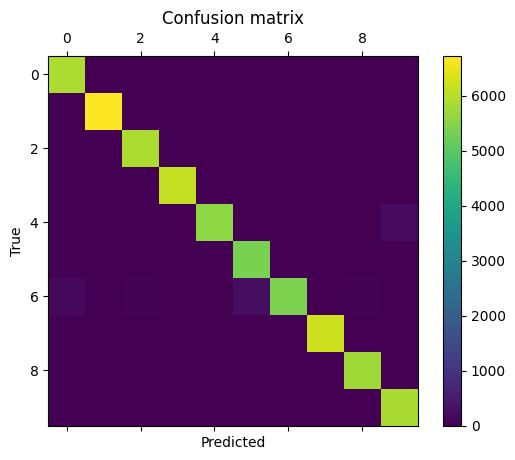

In [94]:
y_pred = model.predict(x_train)
pred   = np.argmax(y_pred, axis=1)
Y = np.argmax(y_train, axis=1)
confusion_mtx = confusion_matrix(Y, pred)

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(confusion_mtx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_mtx)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [124]:
N = np.random.randint(0, len(x_test))
test_img = x_test[N].squeeze(-1)
test_img = np.array(test_img).reshape(1, test_img.shape[0], test_img.shape[1], 1)
prediction = model.predict(test_img)
pred   = np.argmax(prediction, axis=1)[0]
print(f'True Label: {np.argmax(y_test[N])}, Prediction: {pred}')

1/1 [==============================] - 0s 86ms/step
True Label: 5, Prediction: 5


In [129]:
tf.keras.Model.save(model, 'weights.h5')
model.save('my_model.keras')

In [130]:
del model

In [141]:
# model.load('my_model.keras')
# new_model = tf.keras.models.load_model('my_model.keras')
new_model = tf.keras.models.load_model('weights.h5')

In [142]:
N = np.random.randint(0, len(x_test))
test_img = x_test[N].squeeze(-1)
test_img = np.array(test_img).reshape(1, test_img.shape[0], test_img.shape[1], 1)
prediction = new_model.predict(test_img)
pred   = np.argmax(prediction, axis=1)[0]
print(f'True Label: {np.argmax(y_test[N])}, Prediction: {pred}')

1/1 [==============================] - 0s 115ms/step
True Label: 8, Prediction: 8


In [144]:
import os
os.path.getsize('weights.h5'), os.path.getsize('my_model.keras')

(500744, 482963)